<a href="https://colab.research.google.com/github/IndeewaAmarasinghe/lab_3/blob/main/Paddy_diseases_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Required Libraries

In [1]:
# Step 1: Install Required Libraries
!pip install tensorflow
!pip install matplotlib



In [2]:
# Step 2: Import Libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [3]:
# Step 3: Set Up Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [5]:
# Step 1: Set up ImageDataGenerators for both original and augmented data
train_datagen_orig = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
train_datagen_aug = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)


In [6]:
# Step 2: Load the original training dataset
train_generator_orig = train_datagen_orig.flow_from_directory(
    '/content/drive/MyDrive/Paddy diseases/Rice_Leaf_Diease/Rice_Leaf_Diease/train',  # Path to original train data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 7736 images belonging to 5 classes.


In [7]:
# Step 3: Load the augmented training dataset
train_generator_aug = train_datagen_aug.flow_from_directory(
    '/content/drive/MyDrive/Paddy diseases/Rice_Leaf_AUG/Rice_Leaf_AUG/train',  # Path to augmented data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 7215 images belonging to 5 classes.


In [8]:
# Step 4: Set up ImageDataGenerator for validation (test) data
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)


In [9]:
# Step 5: Load validation (test) dataset
val_generator = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Paddy diseases/Rice_Leaf_Diease/Rice_Leaf_Diease/test',  # Path to validation data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 1797 images belonging to 5 classes.


In [10]:
# Step 6: Combine both training generators using a custom generator
def combine_generators(gen1, gen2):
    while True:
        batch_gen1 = next(gen1)
        batch_gen2 = next(gen2)
        # Combine images and labels from both generators
        combined_images = np.concatenate((batch_gen1[0], batch_gen2[0]), axis=0)
        combined_labels = np.concatenate((batch_gen1[1], batch_gen2[1]), axis=0)
        yield combined_images, combined_labels

In [11]:
# Step 7: Define combined generator for training
combined_train_generator = combine_generators(train_generator_orig, train_generator_aug)


In [12]:
# Step 8: Create your model (for example, using a simple CNN)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')  # 5 classes for rice diseases
])

In [13]:
# Step 9: Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
# Step 10: Train the model using the combined training generator
history = model.fit(
    combined_train_generator,
    steps_per_epoch=len(train_generator_orig) + len(train_generator_aug),  # Adjust for both datasets
    validation_data=val_generator,
    validation_steps=len(val_generator),
    epochs=10
)

Epoch 1/10
468/468 [==============================] - 4061s 9s/step - loss: 0.8439 - accuracy: 0.6853 - val_loss: 0.5309 - val_accuracy: 0.7846
Epoch 2/10
468/468 [==============================] - 520s 1s/step - loss: 0.2906 - accuracy: 0.8935 - val_loss: 0.3459 - val_accuracy: 0.8737
Epoch 3/10
468/468 [==============================] - 521s 1s/step - loss: 0.1419 - accuracy: 0.9489 - val_loss: 0.2454 - val_accuracy: 0.9188
Epoch 4/10
468/468 [==============================] - 525s 1s/step - loss: 0.0615 - accuracy: 0.9792 - val_loss: 0.2616 - val_accuracy: 0.9182
Epoch 5/10
468/468 [==============================] - 523s 1s/step - loss: 0.0519 - accuracy: 0.9833 - val_loss: 0.2977 - val_accuracy: 0.9104
Epoch 6/10
468/468 [==============================] - 509s 1s/step - loss: 0.0450 - accuracy: 0.9838 - val_loss: 0.2972 - val_accuracy: 0.9271
Epoch 7/10
468/468 [==============================] - 504s 1s/step - loss: 0.0446 - accuracy: 0.9852 - val_loss: 0.3796 - val_accuracy: 0.924

In [15]:
# Step 11: Evaluate the model
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


57/57 [==============================] - 32s 563ms/step - loss: 0.5246 - accuracy: 0.8920
Validation Accuracy: 89.20%


In [3]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate predictions for the validation set
# val_generator provides batches of validation data
y_pred = model.predict(val_generator)

# Step 2: Convert predicted probabilities to class labels
# If using softmax output (for multi-class classification), use argmax to get class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Step 3: Get the true labels from the validation set
y_true = val_generator.classes

# Step 4: Classification Report
# Get the class labels from the generator
class_labels = list(val_generator.class_indices.keys())

# Generate the classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", report)

# Step 5: Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Step 6: Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


NameError: name 'model' is not defined

In [2]:
# Step 15: Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Step 16: Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

NameError: name 'true_classes' is not defined

In [16]:
# Step 12: Generate predictions for the validation data
val_generator.reset()
predictions = model.predict(val_generator, steps=len(val_generator), verbose=1)


57/57 [==============================] - 32s 565ms/step


In [17]:
# Step 13: Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)


In [18]:
# Step 14: Get true labels from validation generator
true_classes = val_generator.classes
class_labels = list(val_generator.class_indices.keys())


                       precision    recall  f1-score   support

        Sheath Blight       0.14      0.14      0.14       288
bacterial_leaf_blight       0.20      0.20      0.20       376
           brown_spot       0.20      0.24      0.22       380
              healthy       0.21      0.21      0.21       391
           leaf_blast       0.21      0.16      0.18       362

             accuracy                           0.20      1797
            macro avg       0.19      0.19      0.19      1797
         weighted avg       0.20      0.20      0.19      1797



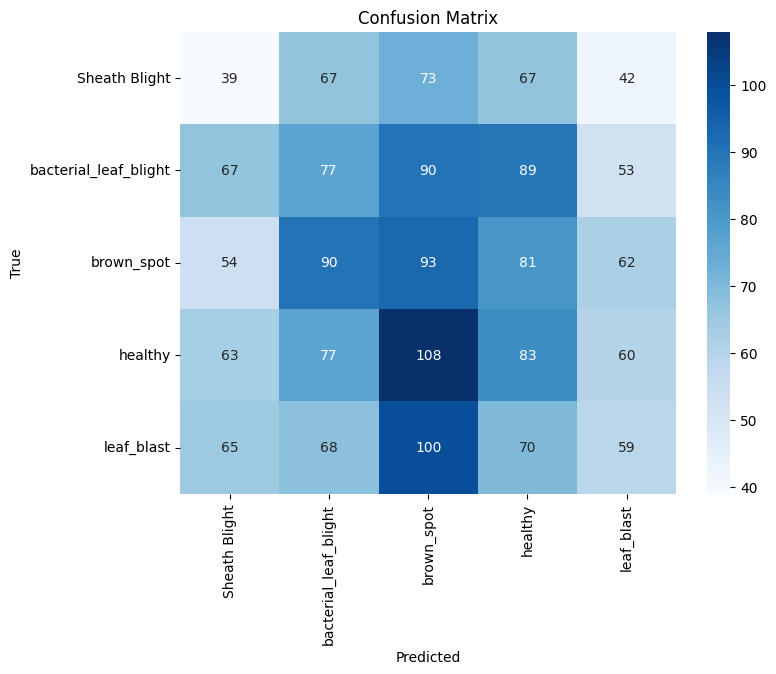

In [21]:
# Step 15: Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Step 16: Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
# Step 15: Classification Report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                       precision    recall  f1-score   support

        Sheath Blight       0.14      0.14      0.14       288
bacterial_leaf_blight       0.20      0.20      0.20       376
           brown_spot       0.20      0.24      0.22       380
              healthy       0.21      0.21      0.21       391
           leaf_blast       0.21      0.16      0.18       362

             accuracy                           0.20      1797
            macro avg       0.19      0.19      0.19      1797
         weighted avg       0.20      0.20      0.19      1797



In [24]:
# Step 16: Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)


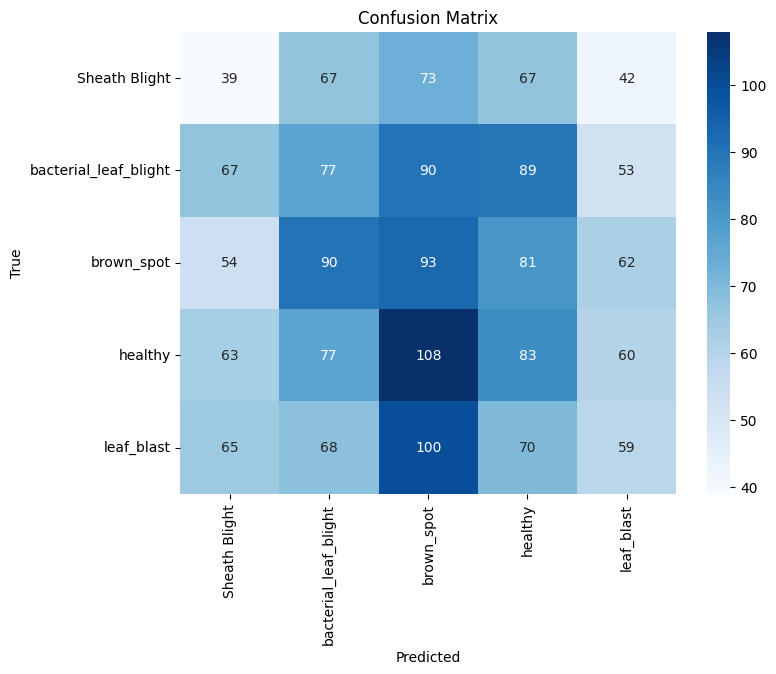

In [25]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Save the model
model.save('/content/drive/MyDrive/rice_disease_model.h5')
print("Model saved successfully!")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!


In [27]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/rice_disease_model.h5')
print("Model loaded successfully!")


Model loaded successfully!


In [31]:
from tensorflow.keras.preprocessing import image

def predict_disease(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize image to match input size
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Scale the image

    # Predict the disease
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    class_labels = list(val_generator.class_indices.keys())

    return class_labels[predicted_class]

# Example: Predict disease from an image file
img_path = '/content/drive/MyDrive/myTest/Brown_Spot.jpg'  # Path to a new image
predicted_disease = predict_disease(img_path)
print(f"The predicted disease is: {predicted_disease}")


1/1 [==============================] - 0s 59ms/step
The predicted disease is: brown_spot


In [32]:
# Disease treatment recommendations dictionary
disease_treatments = {
    "bacterial_leaf_blight": {
        "Symptoms": "Yellowing and wilting of leaves, lesions on leaf veins",
        "Treatment": "Xanthomonas inhibitors (Brand: BlightBan)",
        "How to Use": "Spray BlightBan on affected areas in early morning or late afternoon",
        "Recommendation": "Avoid overhead irrigation to reduce the spread of the bacteria."
    },
    "brown_spot": {
        "Symptoms": "Small, circular, brown lesions on leaves",
        "Treatment": "Fungicides (Brand: Tilt)",
        "How to Use": "Apply Tilt at the booting stage or at the first sign of infection",
        "Recommendation": "Ensure proper field drainage and maintain balanced soil nutrients."
    },
    "healthy": {
        "Symptoms": "No visible symptoms, the plant is healthy.",
        "Treatment": "None",
        "How to Use": "No action required",
        "Recommendation": "Continue with regular crop monitoring."
    },
    "leaf_blast": {
        "Symptoms": "Grayish lesions on leaves, wilting of young plants",
        "Treatment": "Fungicides (Brand: Beam)",
        "How to Use": "Apply Beam at the booting stage. Repeat if symptoms persist.",
        "Recommendation": "Ensure field hygiene and reduce nitrogen application."
    },
    "sheath_blight": {
        "Symptoms": "Irregular lesions on leaves, sheaths, and stems",
        "Treatment": "Fungicides (Brand: Rhizolex)",
        "How to Use": "Spray Rhizolex at first sign of infection, repeat in 7 days if necessary",
        "Recommendation": "Increase spacing between plants to reduce humidity."
    }
}

# Suggest treatment based on predicted disease
def suggest_treatment(predicted_disease):
    treatment_info = disease_treatments.get(predicted_disease, {})

    if treatment_info:
        print(f"Disease: {predicted_disease}")
        print(f"Symptoms: {treatment_info['Symptoms']}")
        print(f"Treatment: {treatment_info['Treatment']}")
        print(f"How to Use: {treatment_info['How to Use']}")
        print(f"Recommendation: {treatment_info['Recommendation']}")
    else:
        print("This situation does not have much effect on paddy cultivation")

# Example: Suggest treatment for predicted disease
suggest_treatment(predicted_disease)


Disease: brown_spot
Symptoms: Small, circular, brown lesions on leaves
Treatment: Fungicides (Brand: Tilt)
How to Use: Apply Tilt at the booting stage or at the first sign of infection
Recommendation: Ensure proper field drainage and maintain balanced soil nutrients.


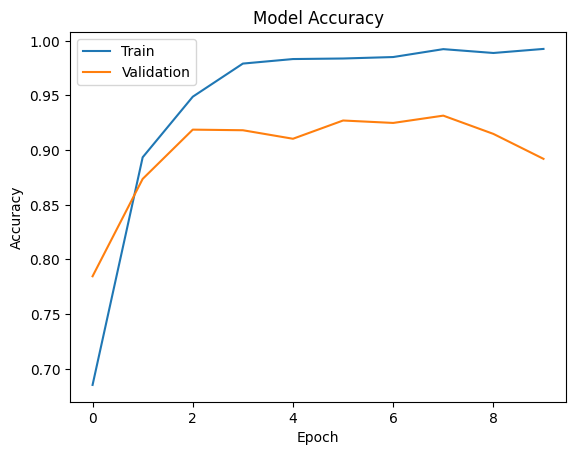

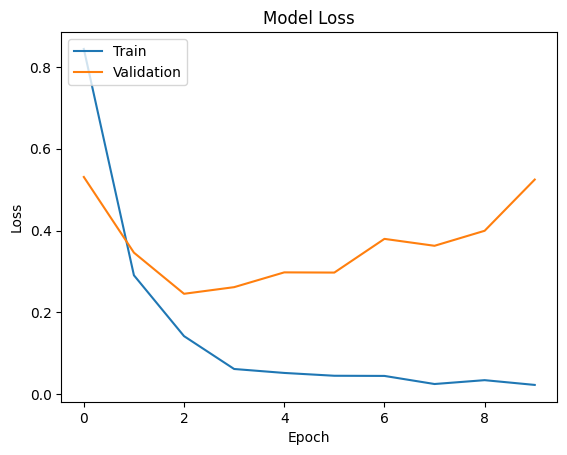

In [30]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
